# Cybersecurity Attack Dataset #
### Analized by: Jakub Kaczmarzewski ###
https://github.com/JakubKaczmarzewski 


### Why this project should interest you?: ###
Cyberattacks are an issue that affects large corporations, small businesses, and everyday users of the vast and ever-evolving world of technology. Understanding potential threats, the most common types of attacks, and the scale of damage they can cause can directly contribute to raising awareness in the field of cybersecurity.

For companies, it’s an opportunity to better understand security gaps, prioritize protection areas, and design effective response strategies. For the average user, it’s knowledge about the threats they may face and how to protect themselves.

This is a project that combines data analysis with a practical impact on the technological security of society.

The dataset used and its description can be found here: *https://www.kaggle.com/datasets/tannubarot/cybersecurity-attack-and-defence-dataset*

### Importing the necessary libraries ###

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# loading data from a CSV file
df = pd.read_csv('Attack_Dataset.csv')

In [7]:
df.head(1)

,ID,Title,Category,Attack Type,Scenario Description,Tools Used,Attack Steps,Target Type,Vulnerability,MITRE Technique,Impact,Detection Method,Solution,Tags,Source,Unnamed: 15
0,1,Authentication Bypass via SQL Injection,Mobile Security,SQL Injection (SQLi),A login form fails to validate or sanitize inp...,"Browser, Burp Suite, SQLMap",1. Reconnaissance: Find a login form on the we...,"Web Login Portals (e.g., banking, admin dashbo...",Unsanitized input fields in SQL queries,"T1078 (Valid Accounts), T1190 (Exploit Public-...","Full account takeover, data theft, privilege e...","Web server logs, anomaly detection (e.g., logi...","Use prepared statements, Sanitize inputs, Limi...","SQLi, Authentication Bypass, Web Security, OWA...","OWASP, MITRE ATT&CK, DVWA",NaN


### Getting Basic Information About Data and Structure

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14133 entries, 0 to 14132
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    14133 non-null  int64 
 1   Title                 14133 non-null  object
 2   Category              14133 non-null  object
 3   Attack Type           14133 non-null  object
 4   Scenario Description  14133 non-null  object
 5   Tools Used            14119 non-null  object
 6   Attack Steps          14133 non-null  object
 7   Target Type           14129 non-null  object
 8   Vulnerability         14115 non-null  object
 9   MITRE Technique       14109 non-null  object
 10  Impact                14130 non-null  object
 11  Detection Method      14129 non-null  object
 12  Solution              14130 non-null  object
 13  Tags                  14130 non-null  object
 14  Source                13973 non-null  object
 15  Unnamed: 15           46 non-null   

<Axes: title={'center': 'Searching the dataset for null values'}>

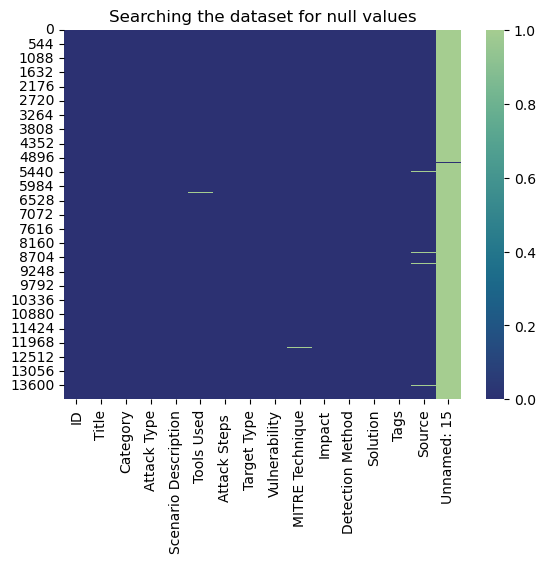

In [10]:
plt.title('Searching the dataset for null values')
sns.heatmap(data=df.isna(),cmap='crest_r')

### Columns without null-values 

In [12]:
df.isna().sum()[df.isna().sum() == 0]

ID                      0
Title                   0
Category                0
Attack Type             0
Scenario Description    0
Attack Steps            0
dtype: int64

### Columns with null values, perhaps we'll do something with them later in the data cleaning section. 

In [14]:
columns_with_na = df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)
columns_with_na

Unnamed: 15         14087
Source                160
MITRE Technique        24
Vulnerability          18
Tools Used             14
Target Type             4
Detection Method        4
Impact                  3
Solution                3
Tags                    3
dtype: int64

/var/folders/th/kwb7gr5960bcybggr8f7glh80000gn/T/ipykernel_14719/1827303792.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columns_to_plot.index, y=columns_to_plot.values, palette='crest')


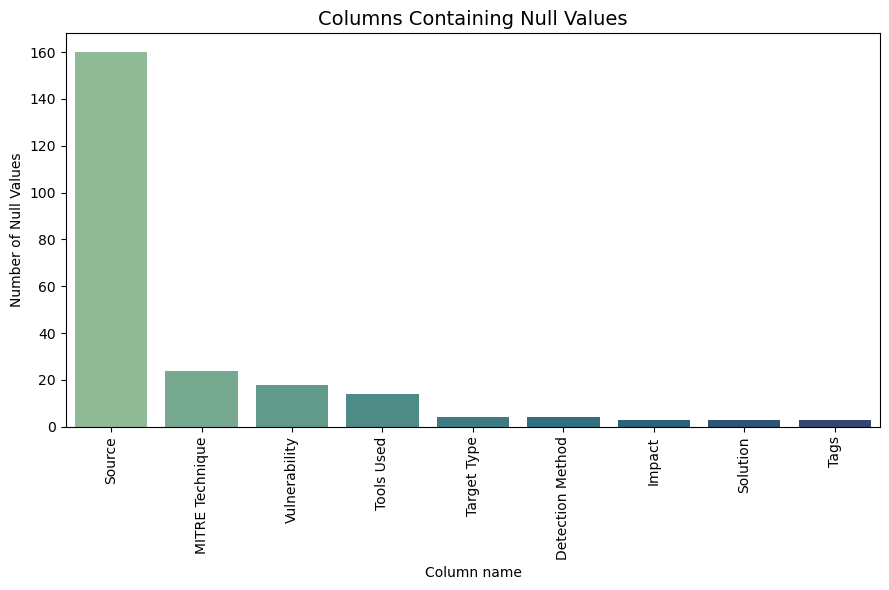

In [15]:
# Unnamed: 15' is excluded because it contains an unusually high number of null values
column_to_exclude = 'Unnamed: 15'
columns_to_plot = columns_with_na.drop(column_to_exclude).sort_values(ascending=False)

# Creating plot
plt.figure(figsize=(9, 6))
plt.title('Columns Containing Null Values', fontsize=14)
sns.barplot(x=columns_to_plot.index, y=columns_to_plot.values, palette='crest')

plt.xticks(rotation=90, fontsize=10)

# Adding X & Y labels
plt.xlabel('Column name')
plt.ylabel('Number of Null Values')

plt.tight_layout()

In my opinion,the dataset is well-prepared for analysis and does not require any special preprocessing at this stage. The missing data is minimal.

## Now it's time to take a look and analyze a few selected cases from the dataset ###

Instead of relying solely on the head() function, I prefer combining it with sample(), as it allows for a broader overview of the dataset and helps to better understand both its structure and the variety of cases it contains. 

In [19]:
df.head(2)

,ID,Title,Category,Attack Type,Scenario Description,Tools Used,Attack Steps,Target Type,Vulnerability,MITRE Technique,Impact,Detection Method,Solution,Tags,Source,Unnamed: 15
0,1,Authentication Bypass via SQL Injection,Mobile Security,SQL Injection (SQLi),A login form fails to validate or sanitize inp...,"Browser, Burp Suite, SQLMap",1. Reconnaissance: Find a login form on the we...,"Web Login Portals (e.g., banking, admin dashbo...",Unsanitized input fields in SQL queries,"T1078 (Valid Accounts), T1190 (Exploit Public-...","Full account takeover, data theft, privilege e...","Web server logs, anomaly detection (e.g., logi...","Use prepared statements, Sanitize inputs, Limi...","SQLi, Authentication Bypass, Web Security, OWA...","OWASP, MITRE ATT&CK, DVWA",NaN
1,2,Union-Based SQL Injection,AI Agents & LLM Exploits,SQL Injection,This attack occurs when a hacker uses the SQL ...,"SQLMap, Burp Suite, Havij, Browser Developer T...",1. Identify User Input Points: Attacker finds ...,"Web Applications, Login Pages, Search Forms",Improperly filtered input fields that allow SQ...,T1190 – Exploit Public-Facing Application,"Data leakage, Credential theft, Account takeov...",Web Application Firewalls (WAF)Log AnalysisInp...,Use parameterized queries (Prepared Statements...,#SQLInjection #WebSecurity #UnionAttack #OWASP...,"OWASP, MITRE ATT&CK, Acunetix, PortSwigger Web...",NaN


In [20]:
df.sample(n=3, random_state=101)

,ID,Title,Category,Attack Type,Scenario Description,Tools Used,Attack Steps,Target Type,Vulnerability,MITRE Technique,Impact,Detection Method,Solution,Tags,Source,Unnamed: 15
10102,10103,Active Directory Enumeration using BloodHound,Blue Team,Discovery,Simulate internal AD recon with detection vali...,"BloodHound, SharpHound, Neo4j",1. Red Team runs SharpHound on a compromised e...,Domain Controller,Excessive LDAP enumeration,"T1087, T1069",Recon for privilege escalation planning,"LDAP logs, Event ID 4662, network share monitors","Throttle queries, detect SharpHound signatures",#bloodhound #discovery #ldap,"SpecterOps, MITRE",NaN
4228,4229,Improper Modifier Logic,Blockchain / Web3,Access Control / Modifier Bugs,Modifiers implementing access control or state...,"Remix, Mythril, Slither",Step 1: Attacker reviews smart contract modifi...,All smart contracts,Faulty modifier syntax or logic,T1602 – Access Token Manipulation,"Unauthorized access, function locking",Code reviews focusing on modifiers; tests of b...,"Ensure modifiers contain _;, use explicit logi...","Modifiers, Access Control Bugs","ConsenSys, MythX",NaN
3771,3772,Influence Function-Based Attack,AI Data Leakage & Privacy Risks,Training Data Attribution using Influence Func...,Influence functions allow attackers to trace w...,"TracIn, PyTorch Influence Functions, Captum",Step 1: Attacker queries the model with a know...,"Fine-tuned models (e.g., NLP, Vision)",Influence-based training traceability,T1606.009 – Influence-Based Membership,Exact recovery of influential training data sa...,Watch for frequent high-rank influence queries...,Clip gradient influence; add DP noise to loss ...,"Influence MIA, TracIn, Attribution Privacy","TracIn Paper, OpenML Papers",NaN


## EDA – Exploratory Data Analysis

### Lets explore each column

In [23]:
df.columns

Index(['ID', 'Title', 'Category', 'Attack Type', 'Scenario Description',
       'Tools Used', 'Attack Steps ', 'Target Type', 'Vulnerability',
       'MITRE Technique', 'Impact', 'Detection Method', 'Solution', 'Tags',
       'Source', 'Unnamed: 15'],
      dtype='object')

### Title ###

In [25]:
len(df['Title'].unique())

13793

We can see that virtually the entire dataset has unique titles for each row. This may be interesting for case-by-case analysis, but it means it won't be useful information for machine learning.

In [27]:
len(df['Title'].value_counts()[df['Title'].value_counts() > 3])

0

### Category ### 

In [29]:
len(df['Category'].value_counts())

64

In [30]:
# Here we will check the distribution of cyberattacks by category and take a look at the most popular.
df['Category'].value_counts()

Category
Insider Threat                                                   569
Physical / Hardware Attacks                                      548
Quantum Cryptography & Post-Quantum Threats                      542
Wireless Attacks (Advanced)                                      535
Malware & Threat                                                 528
                                                                ... 
Automotive / Cyber-Physical Systems → ECU Reverse Engineering      7
Automotive / CPS → Firmware Over-The-Air (FOTA) Abuse              5
Automotive / CPS → Physical Layer Attack                           3
Network security                                                   2
 Mobile Security                                                   1
Name: count, Length: 64, dtype: int64

As we can tell 'Insider Threat', 'Physical / Hardware Attacks', 'Quantum Cryptography & Post-Quantum Threats' are top 3 most popular attacks in this data set.

/var/folders/th/kwb7gr5960bcybggr8f7glh80000gn/T/ipykernel_14719/4054030136.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df['Category'].value_counts(),palette='crest')


Text(0, 0.5, 'number of records')

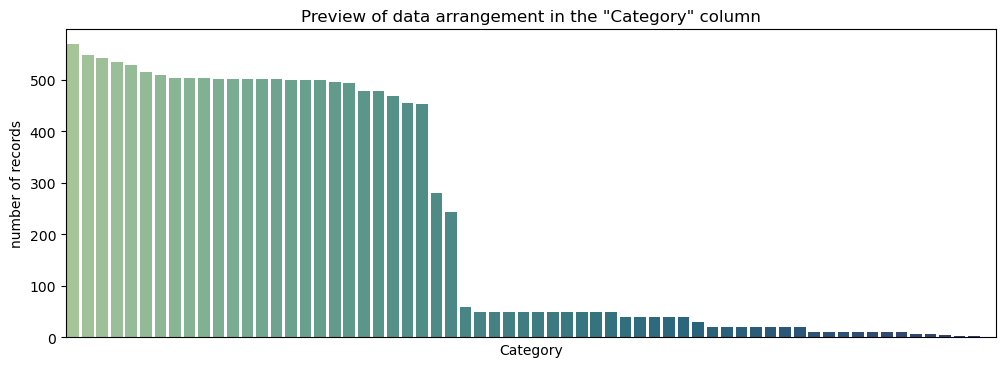

In [32]:
plt.figure(figsize=(12,4))

# Creating plot
sns.barplot(data=df['Category'].value_counts(),palette='crest')

plt.title('Preview of data arrangement in the "Category" column')

plt.xticks(ticks=[], labels=[])
#plt.xticks(rotation=90, fontsize=10)
plt.ylabel('number of records')

In [33]:
popular_attack_categories = df['Category'].value_counts().head(25)

In [34]:
popular_attack_categories

Category
Insider Threat                                                                                                 569
Physical / Hardware Attacks                                                                                    548
Quantum Cryptography & Post-Quantum Threats                                                                    542
Wireless Attacks (Advanced)                                                                                    535
Malware & Threat                                                                                               528
Satellite & Space Infrastructure Security                                                                      515
DFIR                                                                                                           510
Blockchain / Web3                                                                                              503
Blue Team                                                              

In [35]:
# calculating what percentage of the total data set is made up of the 25 most frequently occurring categories
percentage_of_df = popular_attack_categories.sum() / df['Category'].value_counts().sum()
print(f'{(round(percentage_of_df,2) * 100)}%')

89.0%


In this dataset, we have 64 different attack categories, 25 of which constitute 89% of our dataset. We will focus on these initially.

In [37]:
df['Category'][df['Category'].str.contains('Automotive', case=False, na=False)].unique()


array(['Automotive / Cyber-Physical Systems',
       'Automotive / Cyber-Physical Systems → CAN Bus Injection',
       'Automotive / Cyber-Physical Systems → Infotainment System Hacking',
       'Automotive / CPS',
       'Automotive / Cyber-Physical Systems → ECU Reverse Engineering',
       'Automotive / Cyber-Physical Systems → Sensor Spoofing & Physical Layer Attacks',
       'Automotive / CPS → Sensor Spoofing & Physical Layer Attacks',
       'Automotive / CPS → Sensor Spoofing',
       'Automotive / CPS → Physical Layer Attack',
       'Automotive / Cyber-Physical Systems → Wireless Communication Attacks',
       'Automotive / Cyber-Physical Systems → Remote Keyless Entry Exploits',
       'Automotive / Cyber-Physical Systems → Firmware Over-The-Air (FOTA) Abuse',
       'Automotive / CPS → Firmware Over-The-Air (FOTA) Abuse',
       'Automotive / Cyber-Physical Systems → Vehicle Control Manipulation',
       'Automotive / Cyber-Physical Systems → Vehicle Control Manipulation (S

### Source ###

In [39]:
df['Source'].value_counts()

Source
Simulated                    2347
OWASP, MITRE                  299
https://attack.mitre.org      257
Educational                   251
Educational Simulation        219
                             ... 
AI Privacy Best Practices       1
AI Safety Literature            1
Research Reports                1
AI Safety Documentation         1
Open Satellite Consortium       1
Name: count, Length: 7051, dtype: int64

In [40]:
# Check how many unique data sources we have.
len(df['Source'].unique())

7052

Personally, I think in this particular case, the more data sources, the better.

In [42]:
perc_of_simulated_data = df['Source'][df['Source'] == 'Simulated'].count() / df['ID'].count()
print(f'{round(perc_of_simulated_data, 2) * 100}% of simulated data.')

17.0% of simulated data.


Here we see that the most popular category in the "Source" column is "Simulated," accounting for almost 17% of our dataset. This is good for machine learning, but in the presentation and analysis, I'll focus on the actual source data.

In my opinion its good to know what percent of data we are going to analize is simulated and i prefere to avoid data sets with more than 50% of simulated data. 

### Attack Type ###

In [46]:
df['Attack Type'].sample(n=5, random_state=101)

10102                                            Discovery
4228                        Access Control / Modifier Bugs
3771     Training Data Attribution using Influence Func...
12227                               File Activity Timeline
1105       Extraction of Vector Spaces via Similarity APIs
Name: Attack Type, dtype: object

In [47]:
df['Attack Type'].value_counts()

Attack Type
Hardware Interface Exploitation        161
Wireless Attacks (Advanced)             95
Dependency Confusion                    91
Fuzzer Configuration                    75
Malicious Libraries                     74
                                      ... 
JWT Token Tampering                      1
Backend Deserialization Exploit          1
Serverless Function Deserialization      1
Deserialization in MQ Systems            1
Constellation Relay Spoofing             1
Name: count, Length: 8834, dtype: int64

### At a later stage of the analysis, I realized that I would use this type of chart many times, so I decided to write a function to avoid repeating the same code

In [49]:
def create_top_n_plot(data_frame: pd.DataFrame, column_name: str, n: int, title: str = None) -> None:
    """
    Creates a bar chart showing the top n most frequently occurring values in a column.
    
    Parameters:
    
    data_frame (pd.DataFrame): The DataFrame containing the data.
    
    column_name (str): The name of the column you want to analyze.
    
    n (int): The number of most frequently occurring values to show.
    
    Returns: None
    """

    column_counts = data_frame[column_name].value_counts().head(n)
    column_labels = [label.replace(' ', '\n') for label in column_counts.index]
    
    plt.figure(figsize=(12,6))

    if title == None:
        plt.title(f'Top {n} most popular {column_name}', fontsize=14)
    else:
        plt.title(title, fontsize=14)
        
    plt.xticks(fontsize=10)
    plt.ylabel('Number of records')

    sns.barplot(x=column_labels, y=column_counts.values, palette='crest')
    plt.tight_layout()
    plt.show()

/var/folders/th/kwb7gr5960bcybggr8f7glh80000gn/T/ipykernel_14719/117996423.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column_labels, y=column_counts.values, palette='crest')


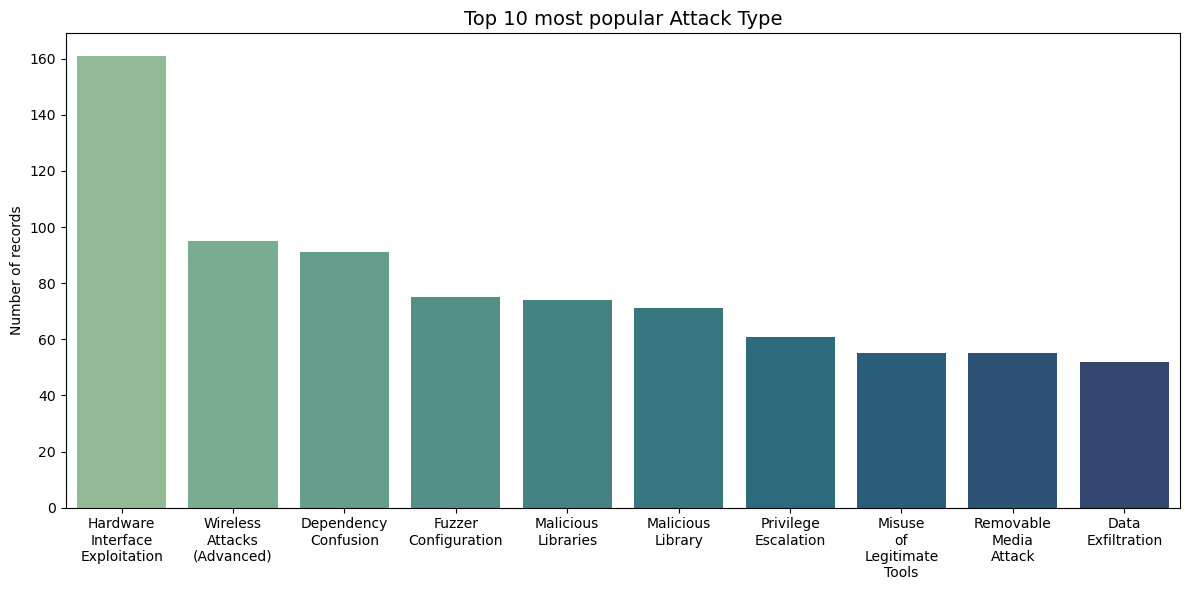

In [50]:
create_top_n_plot(data_frame=df, column_name='Attack Type', n=10)

We can see that most common attack is 'Hardware Interface Exploitation' what make sense with 'Physical / Hardware Attacks' most popular category.

In [52]:
# check tools used and inpact based on each attack type 

In [53]:
len(df['Attack Type'].unique())

8834

## Tools Used ##

In [55]:
df['Tools Used'].head()

0                          Browser, Burp Suite, SQLMap
1    SQLMap, Burp Suite, Havij, Browser Developer T...
2    SQLMap, Burp Suite, Manual Browser Testing, Havij
3    SQLMap, Burp Suite, sqlninja, Manual Browser T...
4    Burp Suite, SQLMap, Postman, Browser Dev Tools...
Name: Tools Used, dtype: object

In [56]:
type(df['Tools Used'][1])

str

We can see that the "Tools Used" column contains text objects representing lists of tools. This means that checking even the most popular ones requires some transformation of this data. Later, I'd like to split these strings and convert them into actual Python list objects to get more interesting results.

In [58]:
df['Tools Used'][1].split(sep=', ')

['SQLMap', 'Burp Suite', 'Havij', 'Browser Developer Tools']

In [59]:
df['Tools Used'].value_counts().head(25)

Tools Used
Velociraptor                                        18
Remix IDE, Ganache, Metamask, Hardhat, ethers.js    17
SDR, GPS Simulator                                  17
KAPE                                                17
Burp Suite, Browser Dev Tools                       14
CMD                                                 14
GRR Rapid Response                                  13
Scapy, Wireshark                                    13
AFL++, libFuzzer                                    13
RF Jammer, Signal Analyzer                          11
libFuzzer                                           11
Browser, Burp Suite, sqlmap                         11
Burp Suite, curl                                    10
See tools table below                               10
Directional RF Jammer                                9
Burp Suite, XSS Hunter                               9
GitHub Actions                                       8
Burp Suite, Firefox DevTools                         8

In [60]:
len(df['Tools Used'].unique())

12936

## This chart shows the tools used in attacks before they were extracted from the lists. I left it in this analysis to show how different conclusions can be based on how the data is interpreted.

/var/folders/th/kwb7gr5960bcybggr8f7glh80000gn/T/ipykernel_14719/117996423.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column_labels, y=column_counts.values, palette='crest')


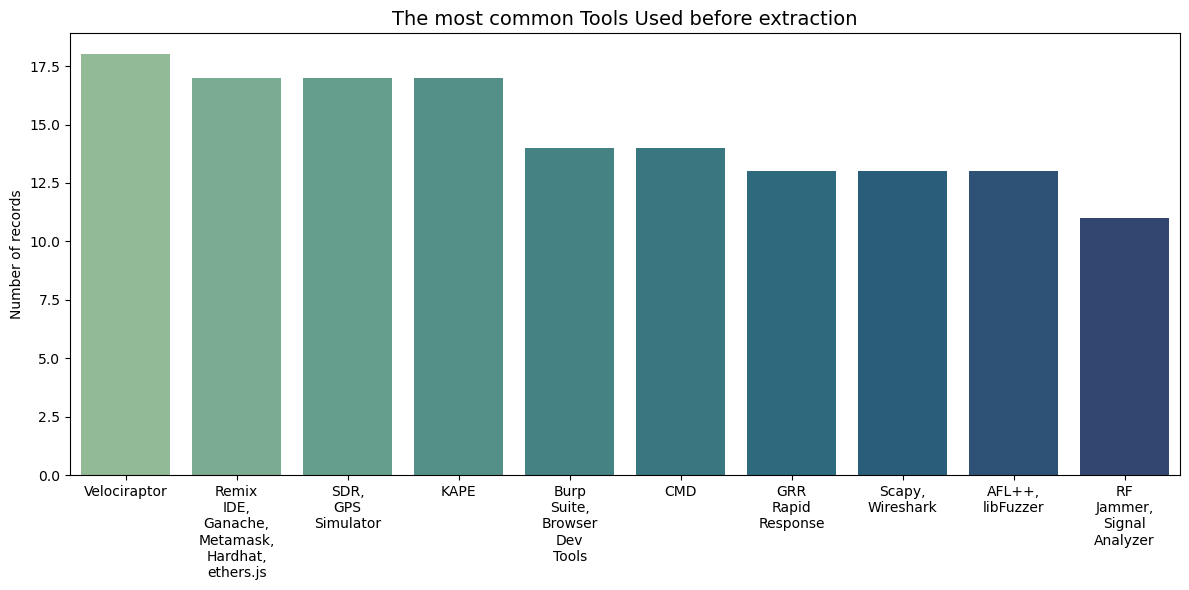

In [62]:
create_top_n_plot(df, 'Tools Used', 10, title='The most common Tools Used before extraction')

### As I mentioned earlier, let's convert the string object into a list and extract information about the programs most commonly used during attacks.

In [64]:
# Split tools string into list
df['Tools List'] = df['Tools Used'].str.split(', ')

In [65]:
tools_exploded = df.explode('Tools List')

In [66]:
tool_counts = tools_exploded['Tools List'].value_counts()
tool_counts

Tools List
Burp Suite                          1117
Wireshark                            711
Python                               507
curl                                 486
Postman                              289
                                    ... 
Prompt Engineering Kits                1
BackProp Exploit Scripts               1
MIA Test Suites                        1
Stable Diffusion + CLIP Guidance       1
Standard Framework Matrix              1
Name: count, Length: 14904, dtype: int64

/var/folders/th/kwb7gr5960bcybggr8f7glh80000gn/T/ipykernel_14719/2678768015.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tool_counts.head(10), palette='crest_r')


<Axes: title={'center': 'Top 10 most popular tools used in attacks'}, xlabel='Tools List', ylabel='count'>

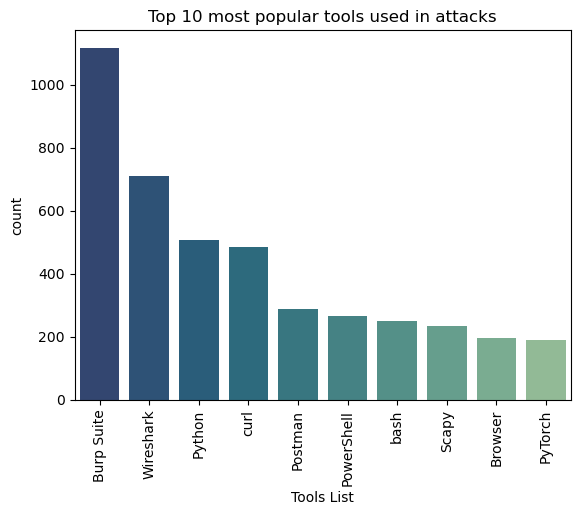

In [67]:
plt.xticks(rotation=90, fontsize=10)
plt.title('Top 10 most popular tools used in attacks')
sns.barplot(data=tool_counts.head(10), palette='crest_r')

In [68]:
tool_counts.head(10)

Tools List
Burp Suite    1117
Wireshark      711
Python         507
curl           486
Postman        289
PowerShell     265
bash           251
Scapy          234
Browser        196
PyTorch        190
Name: count, dtype: int64

In [69]:
tool_counts.shape

(14904,)

## Attack Steps ##

In [71]:
df['Attack Steps '][1]

"1. Identify User Input Points: Attacker finds a search bar, login form, or URL that interacts with the database. 2. Test for Vulnerability: Attacker inputs a single quote ' to break the query. If error messages or unusual behavior occur, it may be vulnerable. 3. Use UNION Operator: Attacker tries to use UNION SELECT to combine their own query with the original one. This reveals additional columns/data. 4. Find Number of Columns: Attacker uses tricks like ORDER BY or trial-and-error UNION SELECT NULL,NULL,... to match the column count of the original query. 5. Extract Data: Once matched, attacker replaces NULL values with username, password, or email columns to steal data. 6. Bypass and Automate: Tools like SQLMap automate this entire process, pulling sensitive data quickly."

In [72]:
df.rename({'Attack Steps ': 'Attack Steps'}, axis=1, inplace=True)

At this point I noticed that there was an unnecessary space at the end of the column name, let's remove it

In [74]:
# Checking for how unique descriptions.
len(df['Attack Steps'].unique())

13895

In [75]:
# Checking total number of values.
len(df['Attack Steps'])

14133

The Attack Steps column contains a description of the attack process. Based on this, you can try to train a neural network that predicts, for example, the type of attack or its damage. However, I will leave this for now.

## Scenario Description ##

In [78]:
df['Scenario Description']

0        A login form fails to validate or sanitize inp...
1        This attack occurs when a hacker uses the SQL ...
2        This attack occurs when an attacker intentiona...
3        In Blind SQL Injection, the attacker doesn’t s...
4        In a Second-Order SQL Injection, the attacker ...
                               ...                        
14128    Researching machine learning models to classif...
14129    Organizing hands-on workshop between agencies ...
14130    Creating a secure national simulation environm...
14131    Designing a scanner tailored to satellite firm...
14132    Measuring alignment with cyber standards acros...
Name: Scenario Description, Length: 14133, dtype: object

In [79]:
df['Scenario Description'][1]

'This attack occurs when a hacker uses the SQL "UNION" operator to combine results from a malicious query with a legitimate one, often gaining access to hidden data from the database through a vulnerable web application.'

The same case as above

## Target Type ##

In [82]:
df['Target Type'].value_counts().head(25)

Target Type
Windows                     291
Workstation                 109
Satellite                    78
Endpoint                     50
Android App                  46
Windows Host                 42
Wireless Networks            36
GitHub Actions               36
Infotainment System          35
Windows Workstation          34
PLC                          33
Internal Network             31
Passenger Vehicle            31
ECU                          30
Android Device               28
Ethereum Smart Contracts     28
Wallet Users                 28
Workstations                 26
Windows Hosts                26
Kubernetes Cluster           25
Windows System               24
Browser                      24
Mail Server                  23
Application                  22
Server                       21
Name: count, dtype: int64

In [83]:
len(df['Target Type'].unique())

9886

/var/folders/th/kwb7gr5960bcybggr8f7glh80000gn/T/ipykernel_14719/117996423.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column_labels, y=column_counts.values, palette='crest')


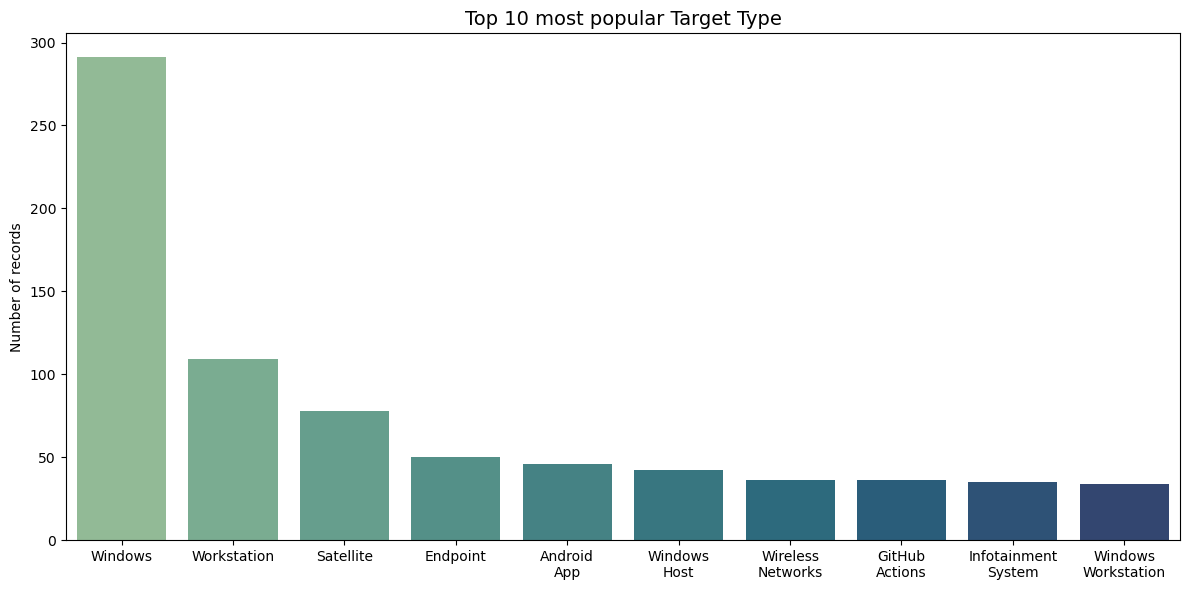

In [84]:
create_top_n_plot(data_frame=df, column_name='Target Type', n=10)

In [85]:
df['Target Type'][df['Target Type'].str.startswith('Windows', na=False)].value_counts().sum()

845

In [86]:
len(df['Target Type'][df['Target Type'].str.startswith('Windows', na=False)].unique())

232

In [87]:
web_target_type = df[df['Target Type'].str.startswith('Web', na=False)]

In [88]:
web_target_type.sample(n=5, random_state=101)

,ID,Title,Category,Attack Type,Scenario Description,Tools Used,Attack Steps,Target Type,Vulnerability,MITRE Technique,Impact,Detection Method,Solution,Tags,Source,Unnamed: 15,Tools List
3254,3255,YAML Deserialization Leading to Arbitrary Code...,Web Application Security,Insecure YAML Deserialization,YAML parser loads untrusted YAML input which c...,"YAML parsers, Burp Suite",Step 1: Identify an app feature parsing YAML i...,Web APIs,Unsafe YAML Deserialization,T1214 – Insecure Deserialization,"Remote code execution, system compromise",Log YAML parsing errors or suspicious commands...,Use safe YAML loading methods; restrict allowe...,"YAML, Deserialization","OWASP, MITRE",NaN,"[YAML parsers, Burp Suite]"
1862,1863,Webhook Header Injection,AI Agents & LLM Exploits,Reverse Flow Injection via Webhook Headers,Malicious headers are included in a webhook th...,"Ngrok, Burp Suite, Postman, Webhook.site, Zapi...",Step 1: Attacker discovers or configures a web...,"Webhooks, AI agents, LLM Automation",Prompt hidden in custom HTTP header,T1190 – Exploit Public-Facing App,LLM responds with attacker-controlled outputs,Scan and restrict incoming webhook headers for...,Sanitize all incoming webhook headers; separat...,"Webhook Prompt Injection, Reverse Flow, Header...","OWASP AI Top 10, Zapier Docs",NaN,"[Ngrok, Burp Suite, Postman, Webhook.site, Zap..."
7411,7412,Web Server Backdoor with PHP Shell,Malware & Threat,Backdoor Implant,Attacker uploads a PHP shell to a web server a...,"Kali Linux, PHP Shell (e.g., c99.php), Burp Suite",Step 1: Attacker finds a vulnerable file uploa...,Web Server (Apache+PHP),Insecure upload validation,"T1505, T1190",Remote code execution via browser,"Web traffic monitoring, anomaly detection","Secure file uploads, block .php files in uploa...","webshell, php, rce, webserver",Simulated,NaN,"[Kali Linux, PHP Shell (e.g., c99.php), Burp S..."
2450,2451,Web Server Logs with %n in URL Field,Operating System Exploits,Format string injection in URL logs,Web servers often log URLs. If %n is logged wi...,"curl, wget, burp, nginx, apache2",Step 1: Open your terminal or browser and send...,Web Servers (Apache/Nginx),Unsafe logging of URL without format escape,T1203 – Exploitation for Priv Escalation,"Memory write, DoS, potential RCE",Analyze web access logs for special symbols li...,Use structured logging functions; validate and...,"Format String, Web Server, URL Injection","OWASP, Apache Docs",NaN,"[curl, wget, burp, nginx, apache2]"
4404,4405,Client-side Randomness (Frontend RNG),Blockchain / Web3,Tampered JavaScript RNG in Frontend,DApps sometimes generate random numbers in the...,"Browser DevTools, Remix, MetaMask, Chrome Exte...",Step 1: The developer writes frontend JavaScri...,"Web3 Frontends, NFT DApps","RNG generated in browser, attacker-controlled",T1612 – Manipulate Client-Generated Input,"Guaranteed rare traits, jackpot, or unfair out...",Check frontend vs on-chain entropy use; valida...,Reject user-supplied randomness; always use on...,"JS RNG Exploit, Frontend Manipulation, NFT Tra...","Web3Audit Reports, OpenZeppelin Blog",NaN,"[Browser DevTools, Remix, MetaMask, Chrome Ext..."


In [89]:
web_target_type['Target Type'].value_counts()

Target Type
Web Browser                                  20
Web Applications                             19
Web applications                             16
Web App                                      13
Web apps                                     12
                                             ..
WebView or DOM Vision Agent                   1
Webview in Mobile App                         1
WebView or Preview Tools in Mobile Agents     1
Web-enabled LLM Agents                        1
Web-Based Satellite Interface                 1
Name: count, Length: 416, dtype: int64

### Here it is clearly visible that our data needs to be cleaned and structured because many values symbolize the same thing, but the way they were written is different. ###

In [91]:
# data transformation: change all letters in the column to lowercase and remove leading and trailing spaces
df['Target Type'] = df['Target Type'].apply(lambda x: x.strip().lower() if isinstance(x, str) else x)

In [92]:
web_target_type['Target Type'].value_counts()

Target Type
Web Browser                                  20
Web Applications                             19
Web applications                             16
Web App                                      13
Web apps                                     12
                                             ..
WebView or DOM Vision Agent                   1
Webview in Mobile App                         1
WebView or Preview Tools in Mobile Agents     1
Web-enabled LLM Agents                        1
Web-Based Satellite Interface                 1
Name: count, Length: 416, dtype: int64

We can see that changing the case of letters positively impacted the reliability of the data, but this wasn't the only issue to be resolved. We can't guarantee that the data doesn't contain other factors that distort the data, such as typos, special characters, or other errors.

In [94]:
df['Target Type'][df['Target Type'].str.startswith('web', na=False)].value_counts()

Target Type
web applications                             35
web browser                                  20
web apps, apis                               16
web app                                      13
web apps                                     13
                                             ..
webview or preview tools in mobile agents     1
web-enabled llm agents                        1
web + network-facing ai agents                1
web servers / public websites                 1
web-based satellite interface                 1
Name: count, Length: 411, dtype: int64

'web app' != 'web apps' we can also expect: 'web apps, apis' != 'web apis, apps' ect.

In [96]:
# at this point I wanted to check how many cases we have in this set that are directly related to the network
web_target_type['Target Type'].value_counts().sum()

583

## Impact ## 

In [99]:
df['Impact'].value_counts().head(25)

Impact
Credential theft                             37
Credential Theft                             30
Remote Code Execution                        26
Remote code execution                        20
T0856                                        18
Account compromise                           14
Full system compromise                       14
T0884                                        12
Code Execution                               12
Unauthorized access                          11
Unauthorized physical access                 10
Credential theft, lateral movement            9
Denial of Service                             9
Privilege Escalation                          8
Persistent Access                             8
Arbitrary Code Execution                      8
Arbitrary code execution                      7
Covert data exfiltration                      7
Credential harvesting                         7
Information Disclosure                        7
Credential theft, session hijacki

### Same case as above ###

examples: 'Credential theft' != 'Credential Theft' and 'Covert data exfiltration' != 'Data exfiltration'

In [102]:
df.head(1)

,ID,Title,Category,Attack Type,Scenario Description,Tools Used,Attack Steps,Target Type,Vulnerability,MITRE Technique,Impact,Detection Method,Solution,Tags,Source,Unnamed: 15,Tools List
0,1,Authentication Bypass via SQL Injection,Mobile Security,SQL Injection (SQLi),A login form fails to validate or sanitize inp...,"Browser, Burp Suite, SQLMap",1. Reconnaissance: Find a login form on the we...,"web login portals (e.g., banking, admin dashbo...",Unsanitized input fields in SQL queries,"T1078 (Valid Accounts), T1190 (Exploit Public-...","Full account takeover, data theft, privilege e...","Web server logs, anomaly detection (e.g., logi...","Use prepared statements, Sanitize inputs, Limi...","SQLi, Authentication Bypass, Web Security, OWA...","OWASP, MITRE ATT&CK, DVWA",NaN,"[Browser, Burp Suite, SQLMap]"


After seeing that typos were appearing not only in one column (which could have been guessed), I decided to convert the entire data set to lowercase letters

In [104]:
df = df.map(lambda x: x.strip().lower() if isinstance(x, str) else x)

In [105]:
df.head(1)

,ID,Title,Category,Attack Type,Scenario Description,Tools Used,Attack Steps,Target Type,Vulnerability,MITRE Technique,Impact,Detection Method,Solution,Tags,Source,Unnamed: 15,Tools List
0,1,authentication bypass via sql injection,mobile security,sql injection (sqli),a login form fails to validate or sanitize inp...,"browser, burp suite, sqlmap",1. reconnaissance: find a login form on the we...,"web login portals (e.g., banking, admin dashbo...",unsanitized input fields in sql queries,"t1078 (valid accounts), t1190 (exploit public-...","full account takeover, data theft, privilege e...","web server logs, anomaly detection (e.g., logi...","use prepared statements, sanitize inputs, limi...","sqli, authentication bypass, web security, owa...","owasp, mitre att&ck, dvwa",NaN,"[Browser, Burp Suite, SQLMap]"


In [106]:
df['Impact'].value_counts().head(25)

Impact
credential theft                             67
remote code execution                        46
t0856                                        18
unauthorized access                          17
full system compromise                       16
account compromise                           15
arbitrary code execution                     15
code execution                               12
t0884                                        12
privilege escalation                         11
persistent access                            11
data exfiltration                            11
unauthorized physical access                 11
data theft                                   10
credential harvesting                        10
denial of service                             9
memory corruption                             9
credential theft, lateral movement            9
information disclosure                        8
covert data exfiltration                      7
credential theft, session hijacki

## Detection Method ##

In [108]:
df['Detection Method']

0        web server logs, anomaly detection (e.g., logi...
1        web application firewalls (waf)log analysisinp...
2        review and monitor error logsenable generic er...
3        monitor for slow and repetitive requestsanalyz...
4        log monitoring for delayed query failurestrack...
                               ...                        
14128                     ml detection accuracy benchmarks
14129                        role-based workshop reporting
14130                        audit logs and anomaly replay
14131                               static binary analysis
14132                           audit + survey correlation
Name: Detection Method, Length: 14133, dtype: object

In [109]:
df['Detection Method'].value_counts().head(10)

Detection Method
registry + prefetch + memory                             9
github secret scanning                                   7
fuzzer logs, crash reports                               6
timing anomaly detection, redundant clock comparisons    5
network anomaly detection                                4
file integrity monitoring                                3
hash verification                                        3
tls-based beacon monitoring and heuristics               3
inspect http/2 headers and flow anomalies                3
detect base64 payloads in http post requests             3
Name: count, dtype: int64

In [110]:
len(df['Detection Method'].unique())

13809

In [111]:
df['Tags'][1]

'#sqlinjection #websecurity #unionattack #owasptop10 #injectionflaws'

In [112]:
df['Tags'].value_counts().head(10)

Tags
gps spoofing, mobile fraud                   4
replay, orbit, satellite spoofing            3
dns, tunneling, iodine                       3
empire, http, powershell                     3
sliver, http2, protobuf                      3
metasploit, meterpreter, reverse shell       3
optics, drone, interception, light attack    3
mitm, satellite command, leo                 3
satellite, replay, injection, spoof          3
satellite, rf, interception, sniffing        3
Name: count, dtype: int64

## Solution

In [114]:
df['Solution'][0]

'use prepared statements, sanitize inputs, limit login attempts, use captcha, enable mfa'

In [115]:
df['Solution'][1]

'use parameterized queries (prepared statements)sanitize all user inputsdisable detailed sql error messagesapply least privilege to database accountsregularly update and patch software'

In [116]:
df['Solution'].value_counts()

Solution
disable debug ports in production                                              4
quarantine + block                                                             4
end-to-end encrypted packet flow, mac verification                             3
block + alert                                                                  3
use tls interception and advanced dpi                                          3
                                                                              ..
use randomized keys and initialization vectors; avoid repeating-key schemes    1
never use ecb; switch to aes-gcm or cbc with iv & mac                          1
use randomized, per-message ivs; never allow user-supplied ivs                 1
avoid des; upgrade to aes or 3des minimum; never allow weak key reuse          1
global cyber policy alignment                                                  1
Name: count, Length: 13851, dtype: int64

## MITRE Technique

This column could be really interesting because it shows the techniques used by cybercriminals during attacks

In [119]:
df['MITRE Technique'][0]

't1078 (valid accounts), t1190 (exploit public-facing app)'

In [120]:
df['MITRE Technique'].value_counts()

MITRE Technique
t1203                                         343
t1552.001                                     224
t1195.002                                     141
t1499                                         120
t1189                                         113
                                             ... 
t1080 – memory scope violation                  1
t1070.004 – residual cache or session data      1
t1643 – improper memory or context sharing      1
t1203 – exploitation via 3rd party plugins      1
t1200, t1069                                    1
Name: count, Length: 5766, dtype: int64

/var/folders/th/kwb7gr5960bcybggr8f7glh80000gn/T/ipykernel_14719/117996423.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column_labels, y=column_counts.values, palette='crest')


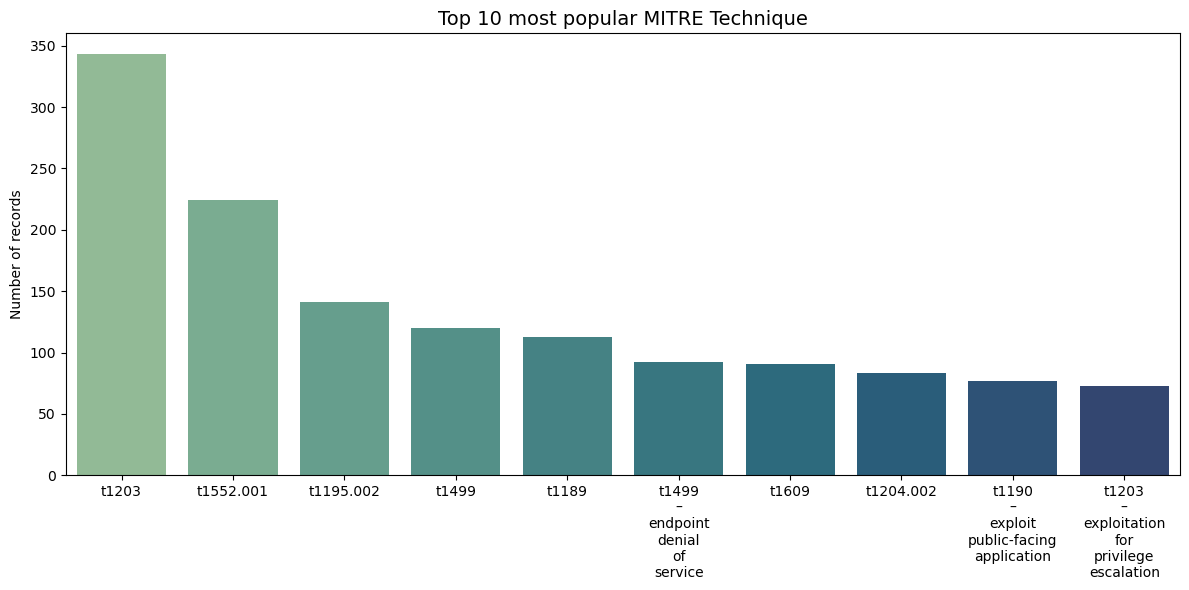

In [121]:
create_top_n_plot(data_frame=df, column_name='MITRE Technique', n=10)

In [122]:
data = [
    {"Code": "T1203", "Name": "Exploitation for Client Execution", "Description": "Exploiting vulnerabilities in client-side applications (e.g., web browsers, office suites) to execute malicious code."},
    {"Code": "T1552.001", "Name": "Credentials in Files", "Description": "Searching for and stealing credentials (passwords, API keys) stored in files on disk."},
    {"Code": "T1195.002", "Name": "Compromise Software Supply Chain: Compromise Software Dependencies and Development Tools", "Description": "Attacking the software supply chain by infecting libraries, dependencies, or tools used in software development."},
    {"Code": "T1499", "Name": "Endpoint Denial of Service", "Description": "Overloading or causing a failure of an endpoint (e.g., host, server) by excessive resource usage or other DoS methods."},
    {"Code": "T1189", "Name": "Drive-by Compromise", "Description": "Compromising a victim by making them visit a malicious or compromised website, which automatically triggers an exploit or malware."}
]

mitre = pd.DataFrame(data)

### Here I have prepared a short description of the most popular attack techniques included in the chart above along with the codes

In [124]:
mitre.head()

,Code,Name,Description
0,T1203,Exploitation for Client Execution,Exploiting vulnerabilities in client-side appl...
1,T1552.001,Credentials in Files,Searching for and stealing credentials (passwo...
2,T1195.002,Compromise Software Supply Chain: Compromise S...,Attacking the software supply chain by infecti...
3,T1499,Endpoint Denial of Service,Overloading or causing a failure of an endpoin...
4,T1189,Drive-by Compromise,Compromising a victim by making them visit a m...


In [125]:
mitre.iloc[0]['Description']

'Exploiting vulnerabilities in client-side applications (e.g., web browsers, office suites) to execute malicious code.'

### After displaying the most frequently occurring cells, I decided to display one of the records and verify whether there were other versions of it in the data set

In [127]:
df['MITRE Technique'][df['MITRE Technique'].str.startswith('t1203',na=False)].value_counts()

MITRE Technique
t1203                                            343
t1203 – exploitation for privilege escalation     73
t1203 – exploitation for client execution         38
t1203 (exploitation for client execution)         38
t1203: exploitation for client execution          13
                                                ... 
t1203 – archive injection                          1
t1203 – document-based command injection           1
t1203 – context injection via file metadata        1
t1203 – contextual injection via url content       1
t1203 (sensor data manipulation)                   1
Name: count, Length: 150, dtype: int64

### At this point, I decided to create an additional analysis based on the first five-part "parent MITRE ID" codes and, based on them, additionally evaluate the most popular categories of techniques

In [129]:
df['Main MITRE Techniques'] = df['MITRE Technique'].apply(lambda x: x[:5] if isinstance(x,str) else x)

In [130]:
parent_technique_id = df['Main MITRE Techniques'].value_counts().head(10)

In [131]:
parent_technique_id

Main MITRE Techniques
t1557    723
t1203    697
t1059    685
t1606    661
t1552    516
t1499    463
t1204    364
t1566    349
t1609    274
t1195    252
Name: count, dtype: int64

/var/folders/th/kwb7gr5960bcybggr8f7glh80000gn/T/ipykernel_14719/2487187596.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(parent_technique_id, palette='crest_r')


Text(0.5, 1.0, 'Attack Techniques (Grouped by Parent MITRE ID)')

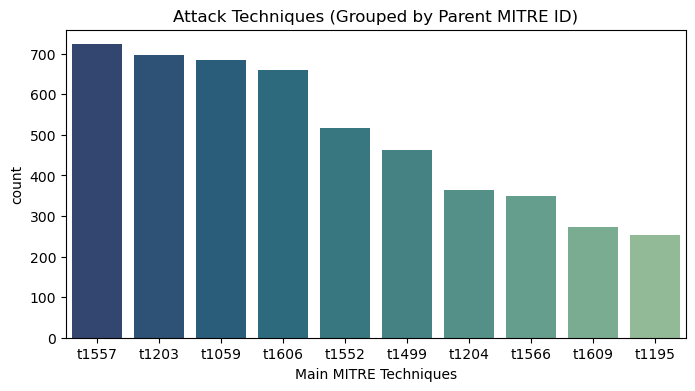

In [132]:
plt.figure(figsize=(8,4))
sns.barplot(parent_technique_id, palette='crest_r')
plt.title('Attack Techniques (Grouped by Parent MITRE ID)')

### As in the previous case, here I also include descriptions of the most popular techniques included in the chart

In [134]:
parent_mitre_data = [
    {"Code": "T1557", "Description": "Man-in-the-Middle – intercepting and possibly altering communications between two parties without their knowledge."},
    {"Code": "T1203", "Description": "Exploitation for Client Execution – exploiting vulnerabilities in client-side applications to execute malicious code."},
    {"Code": "T1059", "Description": "Command and Scripting Interpreter – executing commands or scripts via command-line or scripting environments."},
    {"Code": "T1606", "Description": "Forge Web Credentials – creating or manipulating web authentication tokens or cookies to gain unauthorized access."},
    {"Code": "T1552", "Description": "Unsecured Credentials – obtaining credentials from unsecured storage locations such as files, registry, or configuration files."},
    {"Code": "T1499", "Description": "Endpoint Denial of Service – disrupting the availability of an endpoint system by consuming its resources or exploiting vulnerabilities."},
    {"Code": "T1204", "Description": "User Execution – relying on a user to run malicious content, such as clicking a malicious link or opening a file."},
    {"Code": "T1566", "Description": "Phishing – tricking users into revealing information or executing malicious actions through deceptive communication."},
    {"Code": "T1609", "Description": "Container Administration Command – executing administrative commands inside a container environment to control it."},
    {"Code": "T1195", "Description": "Supply Chain Compromise – inserting malicious components into hardware, software, or services before they reach the victim."}
]

parent_mitre_df = pd.DataFrame(parent_mitre_data)

In [135]:
parent_mitre_df

,Code,Description
0,T1557,Man-in-the-Middle – intercepting and possibly ...
1,T1203,Exploitation for Client Execution – exploiting...
2,T1059,Command and Scripting Interpreter – executing ...
3,T1606,Forge Web Credentials – creating or manipulati...
4,T1552,Unsecured Credentials – obtaining credentials ...
5,T1499,Endpoint Denial of Service – disrupting the av...
6,T1204,User Execution – relying on a user to run mali...
7,T1566,Phishing – tricking users into revealing infor...
8,T1609,Container Administration Command – executing a...
9,T1195,Supply Chain Compromise – inserting malicious ...


In [136]:
parent_mitre_df.iloc[0]['Description']

'Man-in-the-Middle – intercepting and possibly altering communications between two parties without their knowledge.'

## Vulnerability

In [138]:
df['Vulnerability'][0]

'unsanitized input fields in sql queries'

In [139]:
df['Vulnerability'].value_counts().head(10)

Vulnerability
use-after-free                     26
stack overflow                     22
heap overflow                      22
plc                                21
memory corruption                  18
type confusion                     14
stack buffer overflow              14
no anti-jamming countermeasures    13
null pointer dereference           11
buffer overflow                    10
Name: count, dtype: int64

## We have finished analyzing each column individually, now it's time for a deeper analysis

Now I will check the impact grouped by the most common types of attacks

In [236]:
df_hardware_interface_exploitation = df[df['Attack Type'] == 'hardware interface exploitation']

In [242]:
df_hardware_interface_exploitation['Impact'].value_counts()

Impact
credential theft                            3
remote code execution                       2
firmware-level persistence                  2
credential leakage                          2
unauthorized access, reverse engineering    1
                                           ..
dump and offline analysis of firmware       1
disclosure of stored credentials            1
root access or firmware overwrite           1
shell access bypassing login                1
silent, fast data access                    1
Name: count, Length: 156, dtype: int64

### At this point I would like to take a break from this project, perhaps in the near future I will return to it and deepen the analysis, or even enrich it with machine learning or artificial intelligence.

### However, I encourage you to continue and analyze it yourself